In [11]:
%matplotlib inline
import six.moves.cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt


In [33]:
a = pickle.load(open("/data/vnet2_pretrained_with_low_lr_iter_6000_loss.pkl", "rb"))

In [41]:
l = np.array([s["loss"] for s in a])
e = np.array([s["mse"] for s in a])
print l.mean()
losses = l.copy()

b = pickle.load(open("../data/vnet2_iter_6000_loss.pkl", "rb"))
l = np.array([s["loss"] for s in b])
e = np.array([s["mse"] for s in b])
print l.mean()

losses = np.concatenate([l, losses])


1.88934
2.83918


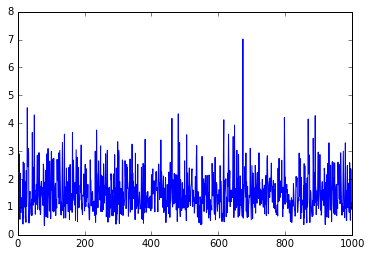

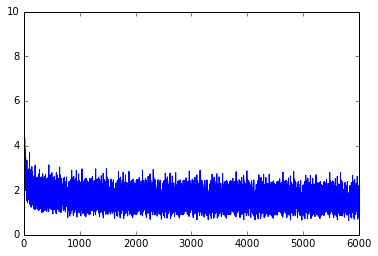

In [43]:
plt.plot(losses[11000:])
plt.show()
plt.plot(e)
plt.show()